In [106]:
# 1. Data Preparation

import pandas as pd
# df=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\datascience2025\assignments\Decision Tree\Decision Tree\heart_disease.xlsx")
# df

In [107]:
heart = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\datascience2025\assignments\Decision Tree\Decision Tree\heart_disease.xlsx",sheet_name='Heart_disease')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [108]:
# 2. Exploratory Data Analysis (EDA)

heart.shape

(908, 13)

In [109]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [110]:
heart.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [111]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [112]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [113]:
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False,False
906,False,False,False,False,False,False,False,False,False,True,False,False,False


In [114]:
heart.isnull().sum()

# SOME OUTLIERS FOUND

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [115]:
heart=heart.fillna(1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,1.0,downsloping,fixed defect,4


In [116]:
heart.isnull().sum()

#OUTLIERS REMOVED

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

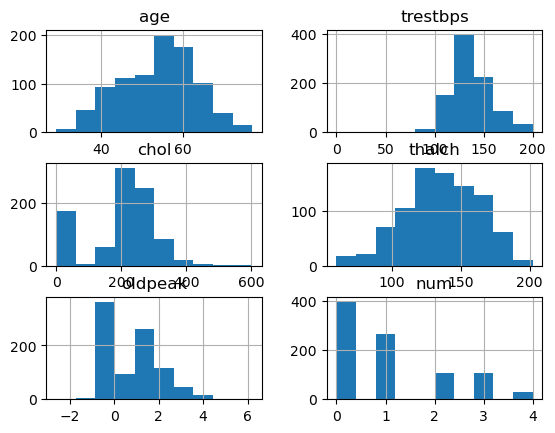

In [117]:
heart.hist()

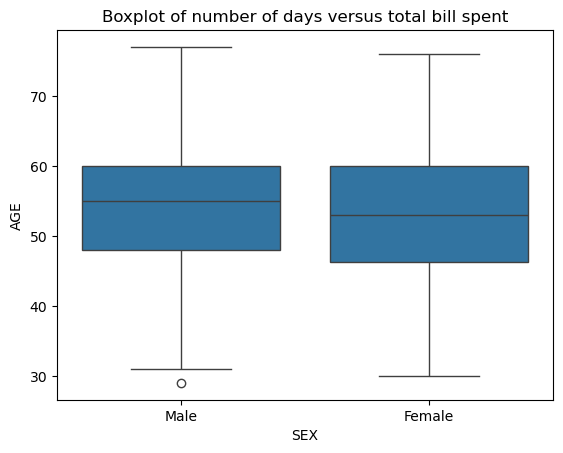

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel("SEX")
plt.ylabel("AGE")
plt.title("Boxplot of number of days versus total bill spent")
sns.boxplot(x='sex', y='age', data=heart)
plt.show()

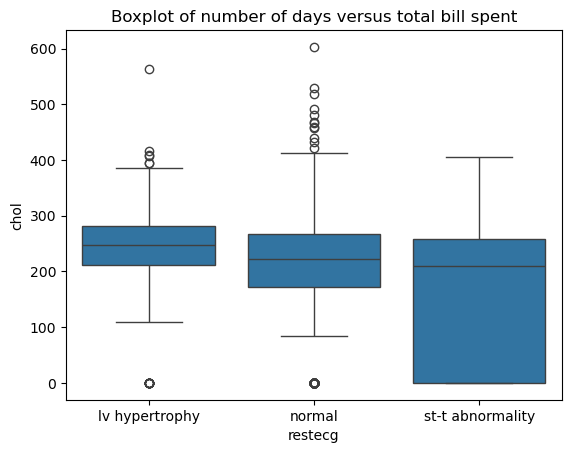

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel("restecg")
plt.ylabel("chol")
plt.title("Boxplot of number of days versus total bill spent")
sns.boxplot(x='restecg', y='chol', data=heart)
plt.show()

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
#LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
heart['sex']=le.fit_transform(heart['sex'])
heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,1,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,1,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,1,non-anginal,144,208,True,st-t abnormality,105,TURE,1.0,downsloping,fixed defect,4


In [122]:
le=LabelEncoder()
heart['cp']=le.fit_transform(heart['cp'])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,1,1,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,1,0,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,1,3,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,1,0,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,1,0,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,1,2,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,1,2,144,208,True,st-t abnormality,105,TURE,1.0,downsloping,fixed defect,4


In [123]:
le=LabelEncoder()
heart['slope']=le.fit_transform(heart['slope'])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,lv hypertrophy,150,False,2.3,0,fixed defect,0
1,41,1,1,135,203,False,normal,132,False,0.0,1,fixed defect,0
2,57,1,0,140,192,False,normal,148,False,0.4,1,fixed defect,0
3,52,1,3,118,186,False,lv hypertrophy,190,False,0.0,1,fixed defect,0
4,57,1,0,110,201,False,normal,126,True,1.5,1,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,normal,120,False,1.5,2,reversable defect,4
904,62,1,0,166,170,False,st-t abnormality,120,True,3.0,1,reversable defect,4
905,56,1,2,170,0,False,lv hypertrophy,123,True,2.5,0,normal,4
906,56,1,2,144,208,True,st-t abnormality,105,TURE,1.0,0,fixed defect,4


In [124]:
le=LabelEncoder()
heart['thalch']=le.fit_transform(heart['thalch'])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,lv hypertrophy,79,False,2.3,0,fixed defect,0
1,41,1,1,135,203,False,normal,61,False,0.0,1,fixed defect,0
2,57,1,0,140,192,False,normal,77,False,0.4,1,fixed defect,0
3,52,1,3,118,186,False,lv hypertrophy,117,False,0.0,1,fixed defect,0
4,57,1,0,110,201,False,normal,55,True,1.5,1,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,normal,49,False,1.5,2,reversable defect,4
904,62,1,0,166,170,False,st-t abnormality,49,True,3.0,1,reversable defect,4
905,56,1,2,170,0,False,lv hypertrophy,52,True,2.5,0,normal,4
906,56,1,2,144,208,True,st-t abnormality,34,TURE,1.0,0,fixed defect,4


In [125]:
le=LabelEncoder()
heart['restecg']=le.fit_transform(heart['restecg'])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,79,False,2.3,0,fixed defect,0
1,41,1,1,135,203,False,1,61,False,0.0,1,fixed defect,0
2,57,1,0,140,192,False,1,77,False,0.4,1,fixed defect,0
3,52,1,3,118,186,False,0,117,False,0.0,1,fixed defect,0
4,57,1,0,110,201,False,1,55,True,1.5,1,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,49,False,1.5,2,reversable defect,4
904,62,1,0,166,170,False,2,49,True,3.0,1,reversable defect,4
905,56,1,2,170,0,False,0,52,True,2.5,0,normal,4
906,56,1,2,144,208,True,2,34,TURE,1.0,0,fixed defect,4


In [126]:
# le=LabelEncoder()
# heart['exang']=le.fit_transform(heart['exang'])
# heart

In [127]:
le=LabelEncoder()
heart['fbs']=le.fit_transform(heart['fbs'])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,79,False,2.3,0,fixed defect,0
1,41,1,1,135,203,0,1,61,False,0.0,1,fixed defect,0
2,57,1,0,140,192,0,1,77,False,0.4,1,fixed defect,0
3,52,1,3,118,186,0,0,117,False,0.0,1,fixed defect,0
4,57,1,0,110,201,0,1,55,True,1.5,1,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,49,False,1.5,2,reversable defect,4
904,62,1,0,166,170,0,2,49,True,3.0,1,reversable defect,4
905,56,1,2,170,0,0,0,52,True,2.5,0,normal,4
906,56,1,2,144,208,1,2,34,TURE,1.0,0,fixed defect,4


In [128]:
le=LabelEncoder()
heart['oldpeak']=le.fit_transform(heart['oldpeak'])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,79,False,33,0,fixed defect,0
1,41,1,1,135,203,0,1,61,False,10,1,fixed defect,0
2,57,1,0,140,192,0,1,77,False,14,1,fixed defect,0
3,52,1,3,118,186,0,0,117,False,10,1,fixed defect,0
4,57,1,0,110,201,0,1,55,True,25,1,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,49,False,25,2,reversable defect,4
904,62,1,0,166,170,0,2,49,True,39,1,reversable defect,4
905,56,1,2,170,0,0,0,52,True,35,0,normal,4
906,56,1,2,144,208,1,2,34,TURE,20,0,fixed defect,4


In [129]:
le=LabelEncoder()
heart['thal']=le.fit_transform(heart['thal'])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,79,False,33,0,0,0
1,41,1,1,135,203,0,1,61,False,10,1,0,0
2,57,1,0,140,192,0,1,77,False,14,1,0,0
3,52,1,3,118,186,0,0,117,False,10,1,0,0
4,57,1,0,110,201,0,1,55,True,25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,49,False,25,2,2,4
904,62,1,0,166,170,0,2,49,True,39,1,2,4
905,56,1,2,170,0,0,0,52,True,35,0,1,4
906,56,1,2,144,208,1,2,34,TURE,20,0,0,4


In [130]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       908 non-null    int64 
 1   sex       908 non-null    int32 
 2   cp        908 non-null    int32 
 3   trestbps  908 non-null    int64 
 4   chol      908 non-null    int64 
 5   fbs       908 non-null    int64 
 6   restecg   908 non-null    int32 
 7   thalch    908 non-null    int64 
 8   exang     908 non-null    object
 9   oldpeak   908 non-null    int64 
 10  slope     908 non-null    int32 
 11  thal      908 non-null    int32 
 12  num       908 non-null    int64 
dtypes: int32(5), int64(7), object(1)
memory usage: 74.6+ KB


In [131]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [132]:
heart=heart.drop('exang', axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,79,33,0,0,0
1,41,1,1,135,203,0,1,61,10,1,0,0
2,57,1,0,140,192,0,1,77,14,1,0,0
3,52,1,3,118,186,0,0,117,10,1,0,0
4,57,1,0,110,201,0,1,55,25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,49,25,2,2,4
904,62,1,0,166,170,0,2,49,39,1,2,4
905,56,1,2,170,0,0,0,52,35,0,1,4
906,56,1,2,144,208,1,2,34,20,0,0,4


In [133]:
features=['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalch',
        'oldpeak', 'slope', 'thal', 'num']
x=heart[features]
x

,age,sex,cp,trestbps,fbs,restecg,thalch,oldpeak,slope,thal,num
0,63,1,3,145,1,0,79,33,0,0,0
1,41,1,1,135,0,1,61,10,1,0,0
2,57,1,0,140,0,1,77,14,1,0,0
3,52,1,3,118,0,0,117,10,1,0,0
4,57,1,0,110,0,1,55,25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,1,49,25,2,2,4
904,62,1,0,166,0,2,49,39,1,2,4
905,56,1,2,170,0,0,52,35,0,1,4
906,56,1,2,144,1,2,34,20,0,0,4


In [134]:
print(set(x))

{'sex', 'num', 'age', 'cp', 'thalch', 'oldpeak', 'slope', 'thal', 'fbs', 'trestbps', 'restecg'}


In [135]:
y=heart['chol']
y

0      233
1      203
2      192
3      186
4      201
      ... 
903      0
904    170
905      0
906    208
907    277
Name: chol, Length: 908, dtype: int64

In [136]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [137]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [138]:
import matplotlib.pyplot as plt

[Text(0.4675680143282662, 0.9761904761904762, 'num <= 0.5\ngini = 0.96\nsamples = 908\nvalue = [172, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n2, 2, 2, 1, 1, 4, 1, 3, 2, 1, 3, 1, 2, 1\n2, 3, 2, 2, 1, 4, 1, 5, 1, 2, 3, 1, 5, 1\n4, 1, 6, 3, 4, 1, 3, 6, 2, 6, 6, 7, 5, 3\n6, 6, 3, 7, 9, 3, 4, 6, 5, 5, 4, 9, 6, 8\n6, 5, 9, 4, 7, 9, 9, 5, 6, 9, 6, 5, 6, 4\n5, 4, 9, 5, 3, 6, 7, 3, 7, 6, 4, 4, 8, 3\n2, 6, 4, 6, 8, 3, 6, 5, 5, 1, 3, 4, 9, 3\n5, 3, 7, 2, 8, 3, 1, 7, 6, 5, 4, 5, 5, 6\n6, 4, 3, 5, 6, 8, 4, 5, 1, 1, 3, 3, 7, 5\n5, 2, 2, 2, 6, 6, 2, 3, 4, 1, 4, 5, 4, 4\n2, 2, 2, 4, 2, 4, 3, 2, 6, 4, 3, 2, 2, 1\n3, 1, 3, 1, 2, 1, 1, 3, 2, 1, 1, 2, 3, 1\n1, 2, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1]'),
 Text(0.2837182877978636, 0.9285714285714286, 'oldpeak <= 9.5\ngini = 0.99\nsamples = 399\nvalue = [20, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0\n2, 1, 0, 0, 1, 3, 1, 2, 0, 1, 2, 0, 2, 0\n0, 2, 0, 1, 0, 3, 0, 2, 1, 2, 

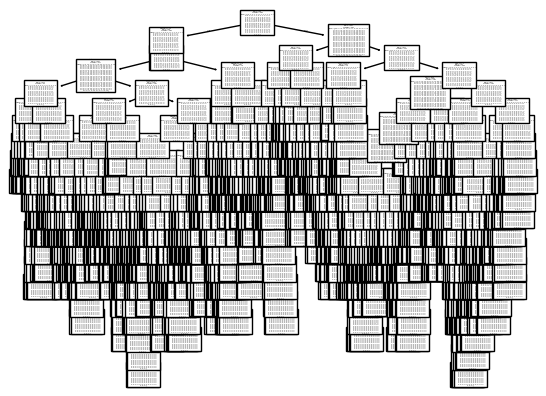

In [139]:
dtree=DecisionTreeClassifier()
dtree.fit(x,y)
tree.plot_tree(dtree, feature_names=x.columns)

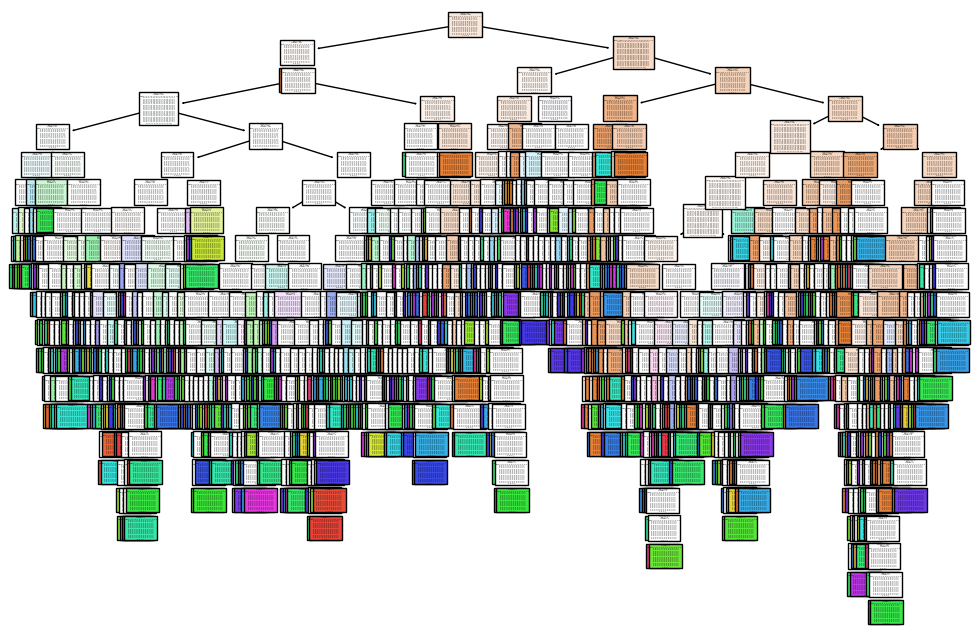

In [140]:
#SINCE ITS LARGER DATASET WE ARE USING FIGSIZE

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier()
dtree.fit(x, y)

plt.figure(figsize=(12, 8))

plot_tree(dtree, feature_names=list(x.columns), filled=True)

plt.show()


In [142]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = dtree.predict(x_train)
confusion_matrix(y_pred, y_train)

array([[145,   0,   0, ...,   0,   0,   0],
       [  0,   1,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   0,   1]], dtype=int64)

In [145]:
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
          85       1.00      1.00      1.00         1
         100       1.00      1.00      1.00         1
         109       1.00      1.00      1.00         1
         111       1.00      1.00      1.00         1
         117       1.00      1.00      1.00         1
         128       1.00      1.00      1.00         1
         129       1.00      1.00      1.00         1
         130       1.00      1.00      1.00         1
         131       1.00      1.00      1.00         1
         142       1.00      1.00      1.00         1
         147       1.00      1.00      1.00         1
         149       1.00      1.00      1.00         1
         153       1.00      1.00      1.00         2
         156       1.00      1.00      1.00         1
         157       1.00      1.00      1.00         1
         160       1.00      1.00      1.00         2
         161       1.00    

In [148]:
# HYPER PARAMETER TUNING OR CROSS VALIDATION SCORE
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dtree, x, y, cv=3)
scores

#this is our scores

C:\Users\HP\anaconda3\anaconda4\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


array([0.01980198, 0.04290429, 0.04635762])

In [ ]:
#INTERVIEW QUESTIONS
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

max_depth – Limits the depth of the tree to prevent overfitting. A deeper tree captures more patterns but may lead to overfitting.

min_samples_split – The minimum number of samples required to split a node. Higher values reduce overfitting by ensuring splits occur only when enough data is available.

min_samples_leaf – The minimum number of samples required in a leaf node. Larger values create a more generalized model.

max_features – Limits the number of features considered for splitting at each node. Helps in reducing variance.

Both techniques are used to convert categorical data into numerical values for machine learning models:

Label Encoding: Assigns a unique integer to each category. Example:

Red → 0
Blue → 1
Green → 2
Pros: Simple and memory-efficient.

Cons: Implies an ordinal relationship, which may mislead models.

One-Hot Encoding: Creates separate binary columns for each category. Example:

Red   Blue  Green
1     0     0
0     1     0
0     0     1
Pros: Avoids ordinal misinterpretation.

Cons: Increases dimensionality, especially with many categories.